# Fake Data Creator


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from random import randint
from faker import Factory,Faker
%matplotlib inline
fake = Faker()
fake.seed(101)

## Classification 

For classification tasks.

In [2]:
from sklearn.preprocessing import normalize,scale

In [11]:
def fixer(x1,mu1,std1,mu2):
    '''
    Fixes column values
    ''' 
    std2 = mu/4.1
    return ((x1-mu1)/(std1)) * (std2) + mu2

In [12]:
# Create Data
data = datasets.make_blobs(n_samples=1000, n_features=4, 
                           centers=2, cluster_std=5)

# Convert to DataFrames
features = pd.DataFrame(normalize(data[0])).apply(lambda x: x+1)
target =  pd.DataFrame(data[1])

In [42]:
#features.describe()

In [6]:
definition = [('Daily Time Spent on Site',65),('Age',36),
              ('Area Income',55000),('Daily Internet Usage',180)]

In [19]:
for i,(feat,mu) in enumerate(definition):
    features[feat]=features[i]
    features[feat]=features[feat].apply(lambda x: fixer(x,features[feat].mean(),features[feat].std(),mu))
    features[feat] = features[feat].apply(lambda x: round(x,2))

In [21]:
features['Age']=features['Age'].apply(lambda x: round(x))

In [25]:
fake.binary()

b'K\x93;s\xeb]\x04\xa4R0\xdbo\xda\xa3\xeb:s\xdd\xc1\xedF\xb5Ac\xa7\x1fy%Y\x89\xf4G\xe8\xa7<\xb5\x8a\x1e}\xfbB\xb2]\xb8\xa3$\x95?\xaa\x12\xebX\x8e=\x12\x85zC\xf6\xe7\x10\xc6w\xabO\xe9Q\xb8)Q\xf4\xec\xe1C\xb8\x94&\x80[O\xef\xc2\xa0\t\x04O\xf2\xef\xb6|\x15-\xd5\x8e\xfc)G6|\x0b\xe0h\x0c\x98|5\xf0\xddL\xf4\xad\x0f\xeeOF\x97\x81\x13\xde\xc3_\xc0\xff\xfc Y\x184\xf4\xd0u\x00E\x81K\'W\x93$IS\x81\x1c\xac\x8d\xe9\xeeI\xcd"\xe4\xcc\xbe\x1d"7-J\xe3Z_\x1b\teY\xdf\xb3F\xa1\xee$Vb\xf2\x0e4p\xc5\xce\x91\x8c@\x0c\r_\x91\xf5|\x89!j\x8a=\xe3\xb7\x8eU_0\\\xfd\xcf\x9a*nM\x19,\xb0\xb3\xaeq\xe2\xd9\xc6C\x88%\xb4u\x0b3P\xad\xe49\xcd\x9b\xa6`}\xfc\xff\x12d\xb5\x1aP\x9c@\xaa\xcc\xe8\xbc\xf6\xf4e\x00\xc3\x87/\x1a\xb9\x95\xe2\xa5*\xb3\xcb\xec\xfa\x0b\xf1a\xfc\xfcG\xa1\xba\x90\x0e$\xa8\x83S\x03\xfc#e\xe6\xd5\x14nR>\xe8\x81\x92\x9f\x8bb\xac\x8c\xa70o\x1a\xe9 v\xa9\x1b{l\xffbS\x8ap1\x16\xf4\x9c\xc4\xa6f\xc6\xb6n\xf1\xf2U\xdf\x80\xeb\x87\'\xa1\xda\xd6\x02A>\x13\xe4\x89g\xa8\x1a\xbd\x8dW\xd5o-\xdf\xf7\x0b<r_\x99L\x07D\

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

X = features.as_matrix()
y = np.ravel(target.as_matrix())

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

rfc = RandomForestClassifier(200)
rfc.fit(X_train,y_train)   

predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.92      0.97      0.95       160
          1       0.97      0.92      0.95       170

avg / total       0.95      0.95      0.95       330



In [14]:
data[0]

array([[ 100.21839473,   99.09178478,   97.46793626,   99.83567771,
          98.33424084],
       [ 100.30112212,  100.3702638 ,  101.80622352,   99.8618209 ,
         101.44058727],
       [ 101.35290575,   98.75308013,   98.61257426,   99.22062648,
          99.35564436],
       ..., 
       [ 100.37541702,  100.27754631,  101.65088114,   99.8177009 ,
         100.36487596],
       [ 100.46712202,  100.17746775,  101.50604104,   99.76402453,
         100.44265958],
       [  98.03329312,  101.26592264,  100.23189027,  101.1031854 ,
          99.36339265]])

In [12]:
t = np.array([[1,2,3],[4,5,6]])
print(t.shape)
#normalize()

(2, 3)


In [ ]:
from scipy import stats

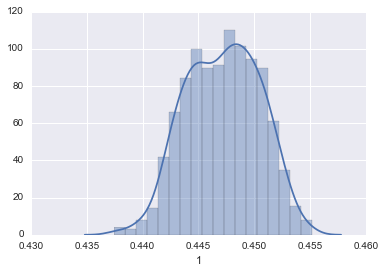

In [189]:
sns.distplot(features[1])

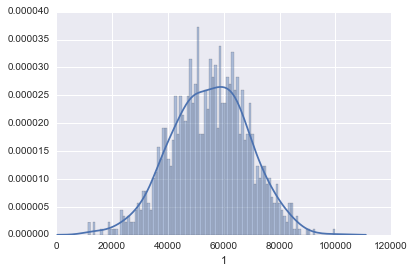

In [27]:
sns.distplot(features[1].apply(lambda x: fixer(x,features[1].mean(),features[1].std(),55000,55000/4)),bins=100)

In [124]:
0.46 -> 100

0.0044

In [ ]:
0.43 -> 1